# An Analysis Of Trending Youtube Videos
Linxiaotong Chen

## Introduction
#### What is Youtube?
YouTube is the most popular and most used video-sharing and video-watching platform of the 21st century. Launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim, three former employees of Paypal, and later purchased by Google in November 2006, it is one of the most visited websites in the world, second only to Google. It offers a wide range of diverse contents, including but not limited to music videos, educational videos, vlogs, movie trailers, live streams, news videos, sports, advertisements, etc. The online platform creates an online community that allows users to create their own channel to upload their videos, subscribe to other people's channels whose content they enjoy, and interact with one another through likes, comments, and shares. To learn more about YouTube visit the site [here](https://en.wikipedia.org/wiki/YouTube)
 
#### Purpose of the Analysis
As one of the biggest media platforms of the 21st century, YouTube has more than 2.5 billion users monthly, who collectively watch more than one billion hours of videos on a daily basis. In addition, 500 hours of videos are uploaded every minute on the platform. This makes YouTube one of the most powerful tools for businesses, advertisers, and content creators to capture desired audiences for their cause(e.g. monetization or attention). Therefore, knowing whether or not a YouTube video is likely to be trending is very useful for them. YouTube has [a list of trending videos](https://www.youtube.com/feed/trending) that updates constantly. YouTube uses the measurement of user interactions(number of views, like, shares, and comments) to determine if the video should be trending. Since we are interested in what makes a YouTube video trending, the purpose of this tutorial is to use the data science pipeline to explore and analyze many factors that contribute to the trending of YouTube videos and use that data to try to predict trending patterns. The data science pipeline is perfect for this goal because it allows us to break down messy and complicated data into a clear and understandable form that we can use to find this predictor. The goal of this tutorial is to guide the audience on how to develop a trending video predicting model and provide businesses, advertisers, and content creators some insight on trending video pattes.




### Importing Some Packages
Let's start by importing some Python packages that we will use to analyze and visualize the data.

In [73]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy import stats
from datetime import datetime
import json

## Data Collection
In this section, we will load the dataset "USvideos.csv" from Kaggle. It contains data about trending YouTube videos from many countries: US, UK/Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan, and India. But for the purpose of this turtoial we will only analyze USA trending videos.
[https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv](https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv)
"USvideos.csv" is a dataset with around 40,000 records of trending YouTube videos collected over 205 days. 

In [75]:
df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Data Processing
In this section, we will use Pandas and NumPy to manipulate our dataframe, which is an pandas object, to fix any missing values in the columns or eliminate any unnecessary columns. 
Here's the the link to the documentation for the pandas and numpy libraries for you to explore their functionalities:
[Pandas](https://pandas.pydata.org/docs/index.html)
[NumPy](https://numpy.org/doc/stable/index.html)

Let's take one more look at the feature columns of our dataframe:

In [76]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [77]:
# Print out the datq types of each columns
print(df.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


The dataframe looks mostly good, but there are rooms for improvements:
* We need to check for any missing values at each column.
* The data in the 'publish time' column should be better if separated into columns one representing the day and another representing the hour of publishing each video for the purpose of our analysis.
* The video_id is an unique 11-character, contain an assortment of numbers and letter, that each YouTube has. The ids are completely random and should have no use in our model and can be cut from the dataframe.
* The category id being just numbers makes it confusing to figure out the category of each video. It should be a string with the name of each videos main category.

#### Check for and adjust missing values
Now, lets look at the number of missing values at each column. We determine this by whether or not the column value is null/NaN.

In [78]:
# Get the percentage of 'NaN' values in the data set
nan_values = df.isna().sum()
nan_percentage = nan_values / len(df) * 100
nan_info = pd.DataFrame({'NaN Values': nan_values, 'Percentage': nan_percentage})
print(nan_info)

                        NaN Values  Percentage
video_id                         0    0.000000
trending_date                    0    0.000000
title                            0    0.000000
channel_title                    0    0.000000
category_id                      0    0.000000
publish_time                     0    0.000000
tags                             0    0.000000
views                            0    0.000000
likes                            0    0.000000
dislikes                         0    0.000000
comment_count                    0    0.000000
thumbnail_link                   0    0.000000
comments_disabled                0    0.000000
ratings_disabled                 0    0.000000
video_error_or_removed           0    0.000000
description                    570    1.391975


As we can see the description column has 570 NaN values. So to clean the data and get rid of those NaN values, we will replace them with an empty string for each NaN value in the description column.

In [79]:
# Make a copy of the dataframe to modify
processed_df1 = df.copy()
# Replace NaN value in the description column with an empty string
processed_df1["description"] = processed_df1["description"].fillna(value="")
processed_df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Lets make sure that the NaN value have been successfully replaced.

In [80]:
print(processed_df1.isna().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64


#### Separate the publish time column into publish day and publish hour
We want to see which days of the week and at what time has the largest numbers of trending videos.

In [81]:
processed_df2 = processed_df1.copy()
# Get the publish day from the publish time and add it to the dataframe
processed_df2["publish_day"] = processed_df2["publish_time"].apply(
    lambda x: datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
# Get the publish hour from the publish time and add it to the dataframe
processed_df2["publish_hour"] = processed_df2["publish_time"].apply(lambda x: x[11:13])
# Remove the original publish time column
processed_df2.drop(labels='publish_time', axis=1, inplace=True)
processed_df2.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day,publish_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Mon,07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Sun,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Mon,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Sun,18


#### Cutting out video_id

In [82]:
processed_df3 = processed_df2.drop(columns=['video_id'])
processed_df3.head()

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day,publish_hour
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Mon,07
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Sun,19
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Mon,11
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Sun,18


#### Replace each category id with its corresponding category name
Fortunately, the USvideo.csv dataset is accompanied by a category JSON file which contains information about each category_id's corresponding category name.

In [83]:
# Load the category data from the JSON file
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]

# Create a dictionary to map category IDs to their names
category_dict = {}
for c in categories:
    category_dict[int(c["id"])] = c["snippet"]["title"]

# Map category IDs to category names and create a new column 'category_name'
processed_df4 = processed_df3.copy()
processed_df4['category_name'] = processed_df4['category_id'].map(category_dict)
processed_df4 = processed_df4.drop(columns=['category_id'])
processed_df4.head()

,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_day,publish_hour,category_name
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Mon,17,People & Blogs
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Mon,07,Entertainment
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Sun,19,Comedy
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Mon,11,Entertainment
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Sun,18,Entertainment


## Exploratory Analysis & Data Visualization
In this section, we will plot processed data and observed the information and trends provided by the graph and use them in our future analysis. 

Here are the main libraries we'll be using to visualize the dataframe. Feel free to explore their functionalities on your own:
[Matplotlib](https://matplotlib.org/stable/index.html) and [Seaborn](https://seaborn.pydata.org/)

A trending video can be identified by three major measurements: 
* Number of Likes
* Number of Views
* Number of Comments
So first, lets plot a graph of number of trending YouTube videos over number of likes, views, and comments. 

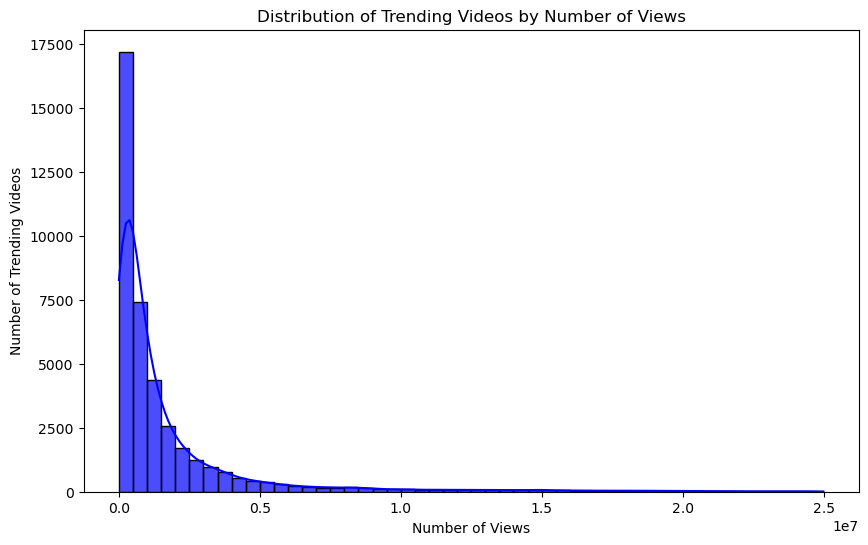

In [30]:
figure, axis = plt.subplots(figsize=(10, 6))
sns.histplot(processed_df4[processed_df4["views"] < 25e6]["views"], kde=True, 
                 color="blue", bins=50, alpha=0.7, ax=axis)
axis.set(xlabel="Number of Views", ylabel="Number of Trending Videos")
plt.title('Distribution of Trending Videos by Number of Views')
plt.show()

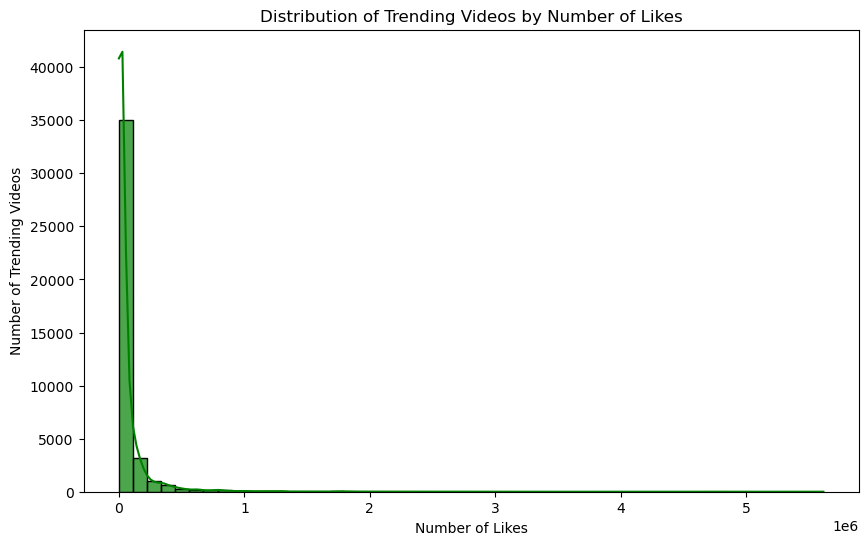

In [31]:
figure, axis = plt.subplots(figsize=(10, 6))
sns.histplot(processed_df3["likes"], kde=True, 
             color="green", bins=50, alpha=0.7, ax=axis)
axis.set(xlabel="Number of Likes", ylabel="Number of Trending Videos")
plt.title('Distribution of Trending Videos by Number of Likes')
plt.show()

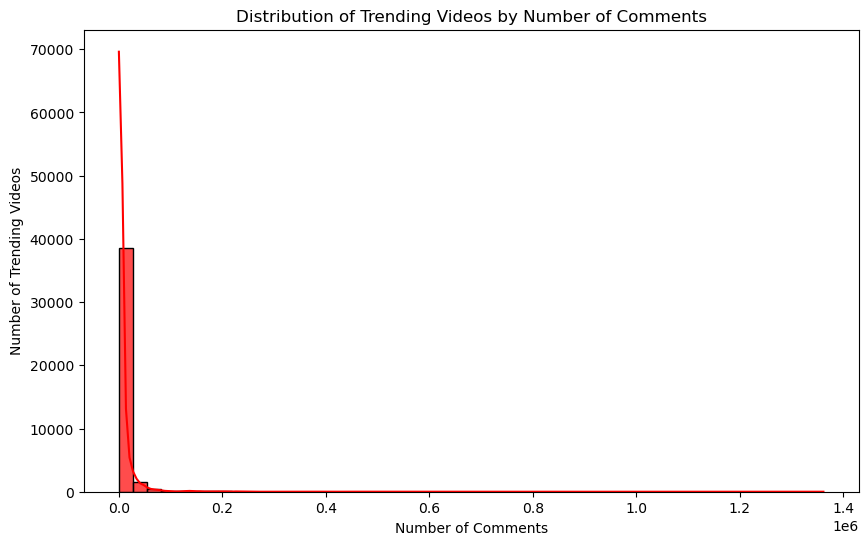

In [32]:
figure, axis = plt.subplots(figsize=(10, 6))
sns.histplot(processed_df3["comment_count"], kde=True, 
             color="red", bins=50, alpha=0.7, ax=axis)
axis.set(xlabel="Number of Comments", ylabel="Number of Trending Videos")
plt.title('Distribution of Trending Videos by Number of Comments')
plt.show()

Upon looking at the distribution of views, likes, and comments of all the trending YouTube videos in our dataframe, we can observe that a majority of trending YouTube videos have around 1,000,000 views, 50,000 likes, and 5000 comments. These are good thresholds for measuring the average likelihood of a YouTube video becoming trending.

Now that we have observe the basic qualities of a trending YouTube, we also want to know when should we post a video so it has the highest likelihood of becoming a trenidng video. Lets review the best day of the week and best time of the day to release a trending YouTube video.

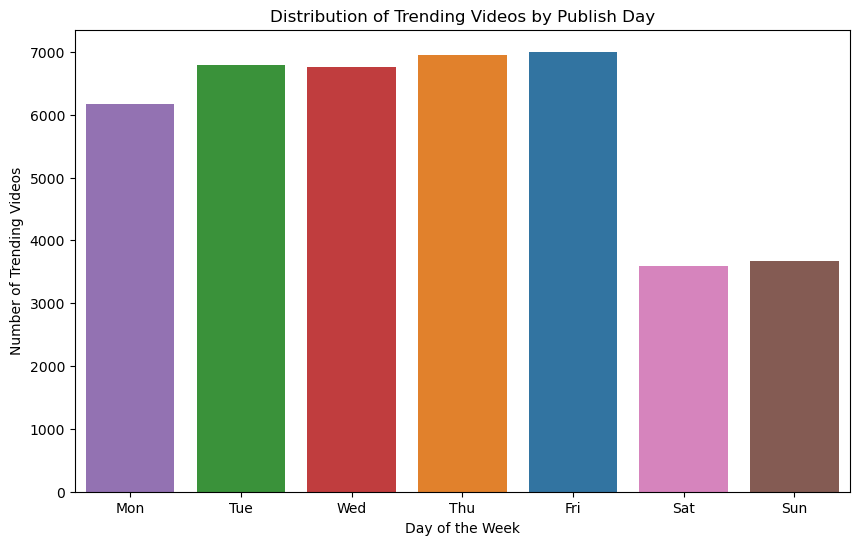

In [28]:
# Group by publish day and count the number of videos for each day
publish_day_counts = processed_df4['publish_day'].value_counts()

# Sort the days of the week in the correct order
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plotting the distribution of trending videos by publish day
plt.figure(figsize=(10, 6))
sns.barplot(x=publish_day_counts.index, y=publish_day_counts, order=days_order, hue=publish_day_counts.index)
plt.title('Distribution of Trending Videos by Publish Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trending Videos')
plt.show()

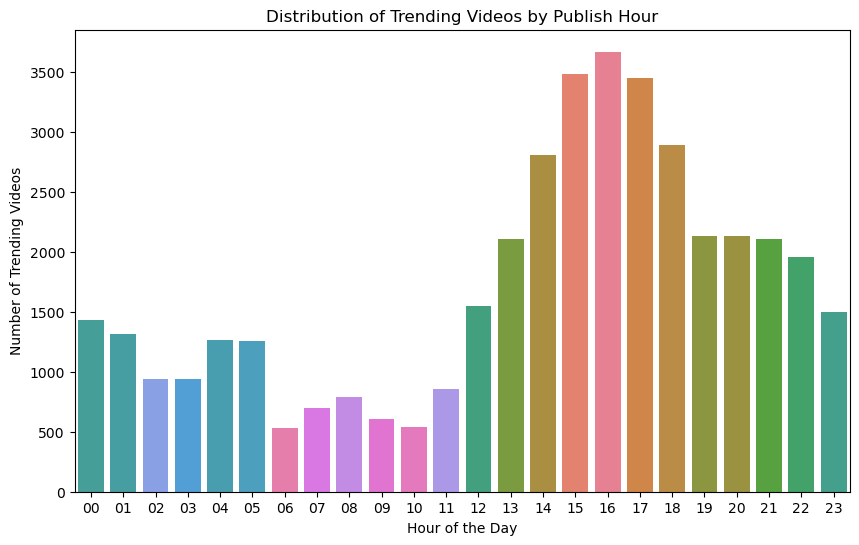

In [29]:
# Group by publish hour and count the number of videos for each hour
publish_hour_counts = processed_df4['publish_hour'].value_counts()

# Sort the hours of the day in chronological order
hours_order = sorted(processed_df4['publish_hour'].unique())

# Plotting the distribution of trending videos by publish hour
plt.figure(figsize=(10, 6))
sns.barplot(x=publish_hour_counts.index, y=publish_hour_counts, order=hours_order, hue=publish_hour_counts.index)
plt.title('Distribution of Trending Videos by Publish Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trending Videos')
plt.show()

From our observations of the 'Distribution of Trending Videos by Publish Day' and 'Distribution of Trending Videos by Publish Hour' bar graph, we can conclude that most trending YouTube videos are being posted on Tuesday through Friday and the ideal time in the days are around 9AM to 1PM. The worst days to post videos are on Saturday and Sunday and the worst time in the days are from 1AM to 5AM. The best and worst time of the day to post trending videos are fairly predictable as people usually have spare time during their morning routine or lunch break to watch something while 1AM to 5AM are usually when everyone is asleep. Surprisingly, the weekend has the least amount of trending videos since that when people have the most free time. 

The quality of the video itself is also important. Its descriptions, tags, title, and category help appeal to the viewers. 

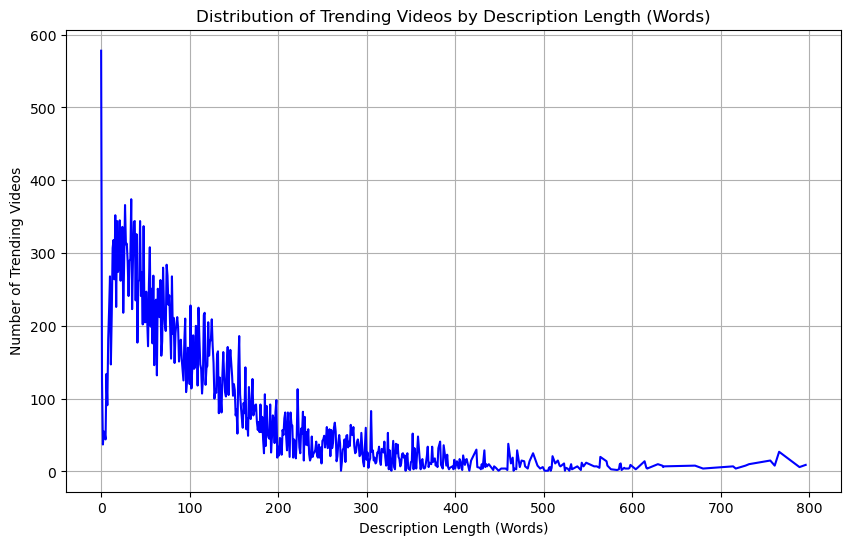

In [34]:
# Count the number of videos for each description word count
description_word_count = processed_df4['description'].str.split().apply(len).value_counts().sort_index()

# Plotting the distribution of trending videos by the length of the description by words using a line plot
plt.figure(figsize=(10, 6))
plt.plot(description_word_count.index, description_word_count.values, color='blue', linestyle='-')
plt.title('Distribution of Trending Videos by Description Length (Words)')
plt.xlabel('Description Length (Words)')
plt.ylabel('Number of Trending Videos')
plt.grid(True)
plt.show()

Most trending YouTube videos have around 0-50 words of description about the video. Therefore, having a short and simple description of the video may attract more viewers. 

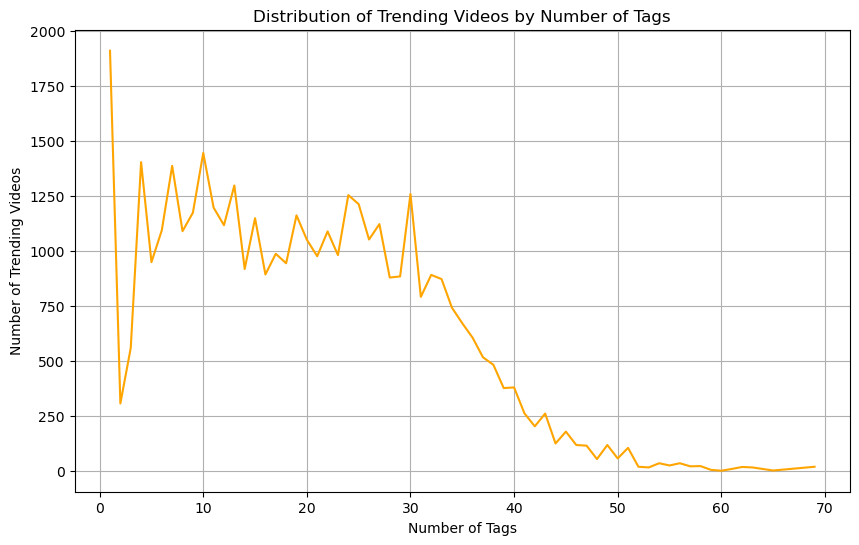

In [35]:
# Calculate the number of tags for each video 
tag_counts = processed_df4['tags'].str.split('|').apply(len)

# Count the frequency of videos for each tag count
tag_counts_frequency = tag_counts.value_counts().sort_index()

# Plotting the distribution of trending videos by the number of tags using a line plot
plt.figure(figsize=(10, 6))
plt.plot(tag_counts_frequency.index, tag_counts_frequency.values, color='orange', linestyle='-')
plt.title('Distribution of Trending Videos by Number of Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Trending Videos')
plt.grid(True)
plt.show()

From the graph we can see that having around 5 to 30 tags may result in a higher likeihood of a video trending. The truely ideal range should be around 5 to 15 as like descriptions having a lower number of video defining tags capture more viewer attention.

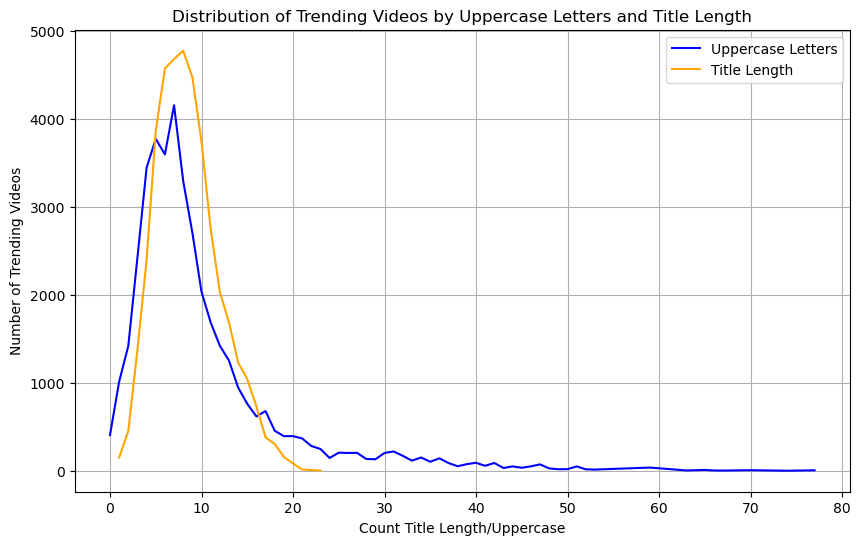

In [37]:
# Calculate the number of uppercase letters in the title for each video
uppercase_counts = processed_df4['title'].str.count(r'[A-Z]')

# Calculate the length of the title for each video without modifying the original dataframe
title_lengths = processed_df4['title'].str.split().apply(len)

# Count the frequency of videos for each count of uppercase letters
uppercase_counts_frequency = uppercase_counts.value_counts().sort_index()

# Count the frequency of videos for each title length
title_lengths_frequency = title_lengths.value_counts().sort_index()

# Plotting the distribution of trending videos by the number of uppercase letters and the length of the title using a line plot
plt.figure(figsize=(10, 6))
plt.plot(uppercase_counts_frequency.index, uppercase_counts_frequency.values, color='blue', linestyle='-', label='Uppercase Letters')
plt.plot(title_lengths_frequency.index, title_lengths_frequency.values, color='orange', linestyle='-', label='Title Length')
plt.title('Distribution of Trending Videos by Uppercase Letters and Title Length')
plt.xlabel('Count Title Length/Uppercase')
plt.ylabel('Number of Trending Videos')
plt.legend()
plt.grid(True)
plt.show()

The plot of the number of uppercase letters in the title indicates that 1 to 15 uppercase letters is the ideal range. Uppercase letters help emphasis the importance of certain topics touch upon in the video. Similarily to video description, the length of the title should be kept short and simple, ideally hovering around 5 to 15 words.

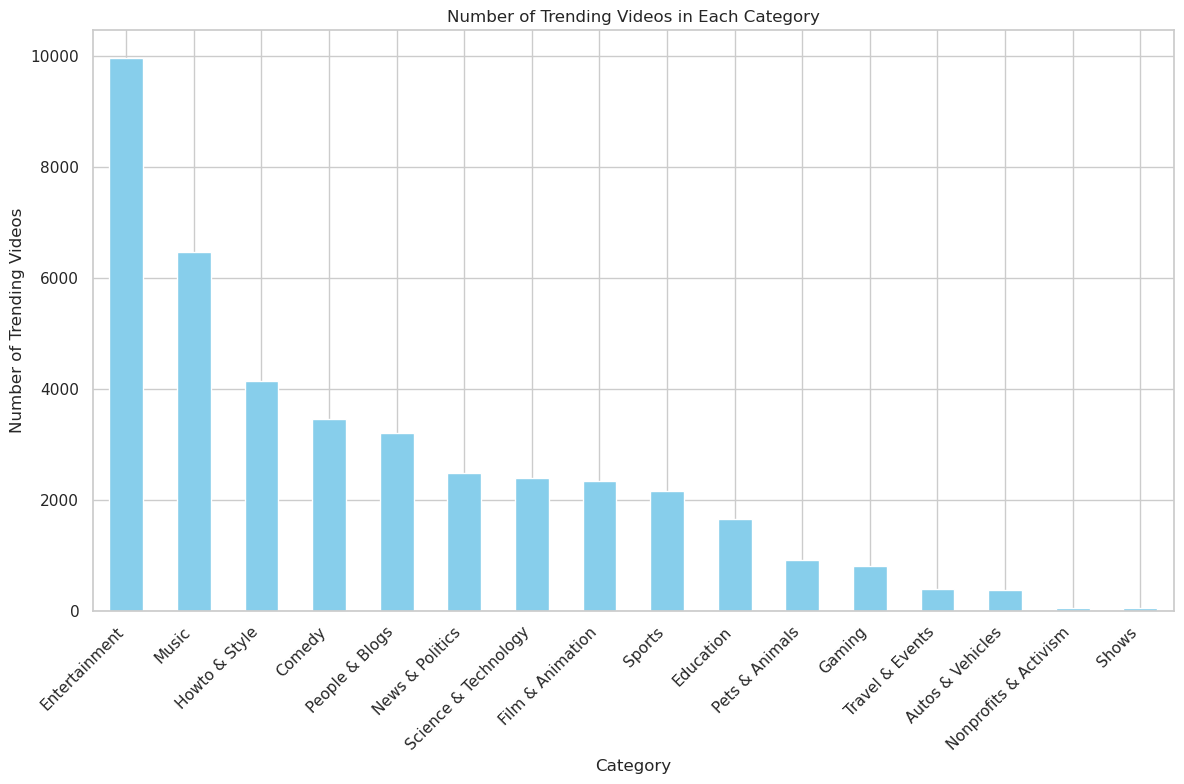

In [184]:
# Count the number of trending videos in each category
category_counts = processed_df4['category_name'].value_counts()

# Plotting the number of trending videos in each category using a bar graph
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trending Videos in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

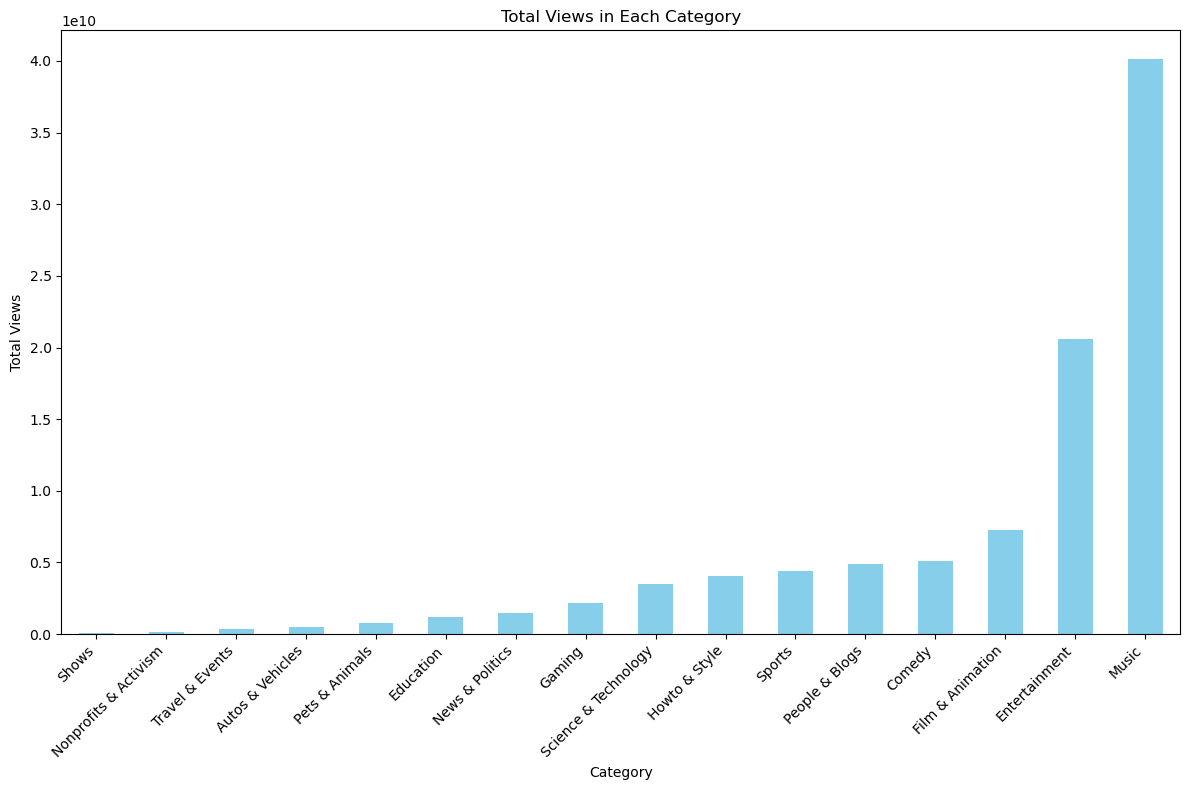

In [41]:
# Group by category and sum the number of views for each category
category_views = processed_df4.groupby('category_name')['views'].sum()

# Plotting the total number of views for each category using a bar graph
plt.figure(figsize=(12, 8))
category_views.sort_values().plot(kind='bar', color='skyblue')
plt.title('Total Views in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The top 3 categories with the highest number of trending videos are Entertainment, Music, and Howto & Style, respectively. However, the top 3 categories with the highest number of views are Music, Entertainment, Film & Animation, respectively. Even though, Entertainment has more trending videos, the category has lower number of views as compared to Music. Also, even though Film and animation has less trending video, it has comparable number of views to Entertainment.

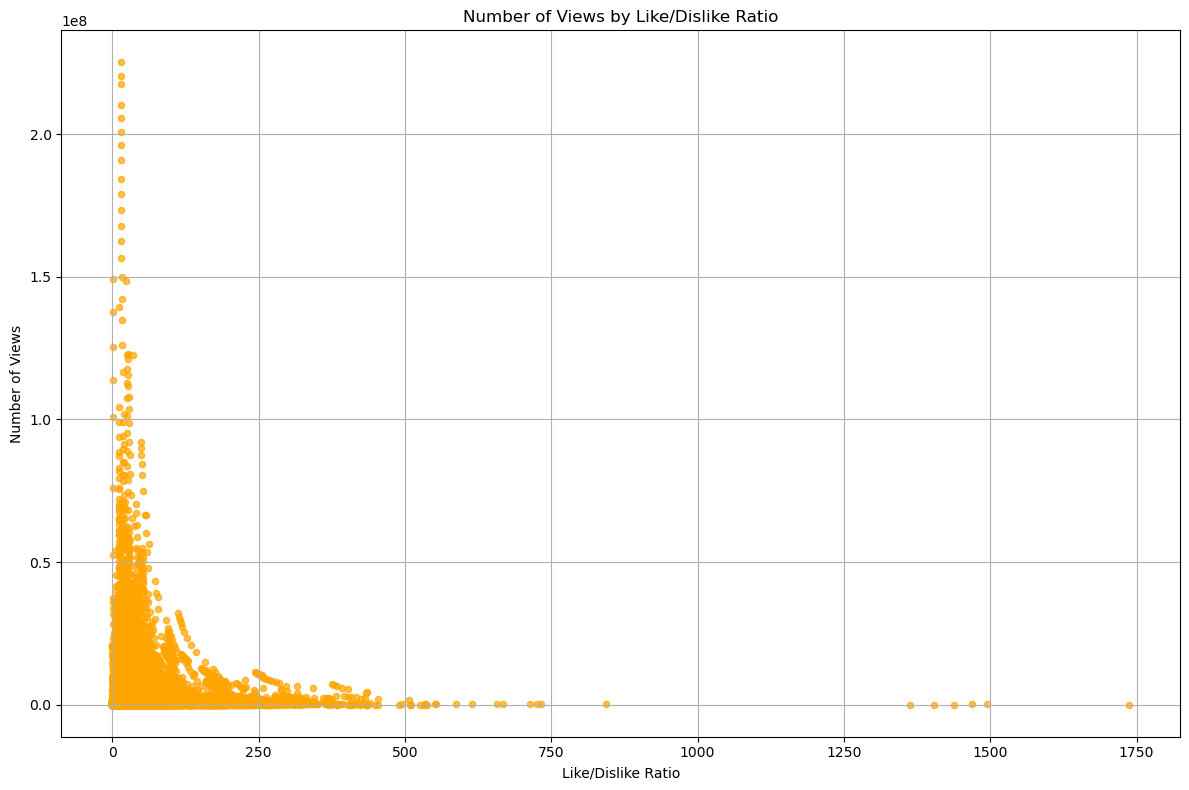

In [44]:
# Calculate the like/dislike ratio for each video 
like_dislike_ratio = processed_df4['likes'] / processed_df4['dislikes']

# Plotting the number of views by like/dislike ratio using a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(like_dislike_ratio, processed_df4['views'], color='orange', s=20, alpha=0.7)
plt.title('Number of Views by Like/Dislike Ratio')
plt.xlabel('Like/Dislike Ratio')
plt.ylabel('Number of Views')
plt.grid(True)
plt.tight_layout()
plt.show()

According to the graph, the like/dislike ratio of a trending YouTube video is ideally less than 50, but greater than 1. We wan to ensure that the video is in this range as that video is a video taht ca spark up good conversations and attentions.

## Analysis, Hypothesis Testing, & ML
In this section, we will implement two machine learning models to predict whether a given video will trend on YouTube. This will be a binary classification problem. The algorithms we will be using are:
* Random Forest: Buidling on multiple decisions trees and combine thir prediction to make the most accurate classification. It's robustness to overfitting and ability to capture non-linear relationships between features helps with the compex nature of how videos trend on YouTube. 
* K-Nearest Neighbors(KNN): As one of the most simple and intuitive algorithm for classification, it can easily add new data based on the majority class of its k nearest neighbors. It require no training phase and very adaptable.

In [71]:
# Define a function to determine if a video is trending
def is_trending(video):
    threshold_views = 1000000  # Threshold for views
    threshold_likes = 50000  # Threshold for likes
    threshold_comments = 5000  # Threshold for comments
    
    if (video['views'] > threshold_views) and (video['likes'] > threshold_likes) and (video['comment_count'] > threshold_comments):
        return 1  # Trending
    else:
        return 0  # Not trending

# Generate labels dynamically based on the function
y_trending = processed_df4.apply(is_trending, axis=1)

# Define features
X = processed_df4[['views', 'likes', 'comment_count']]

# Initialize classifiers
random_forest = RandomForestClassifier(n_estimators=500, random_state=50, max_depth=4)
knn = KNeighborsClassifier(n_neighbors=5)

# Implement 10-fold cross-validation for Random Forest
rfr_score = cross_val_score(random_forest, X, y_trending, cv=10)
print("The average score for Random Forest is ", np.average(rfr_score))

# Implement 10-fold cross-validation for KNN
knn_score = cross_val_score(knn, X, y_trending, cv=10)
print("The average score for KNN is ", np.average(knn_score))


The average score for Random Forest is  0.9985592185592186
The average score for KNN is  0.9604382123874062


The Random forest model has the better accuracy score between the two models. Since we are tackling a binary classification problem, the categorical capabilities of the random forest generate more accurate predictions. The classifier parameters in both model was chosen through multiple trials and errors to obtain the best fit. 5 nearest neighbor is what works best for the KNN model. For the random forest, we want as many trees as possible, but also want the model to run smoothly, so 500 was the ideal. The random state help enforce the randomness of the algorithm. The max depth was chosen to reduce complexities for the features.

Let's observe the statistical significant of our model through hypothest testing. The null hypothesis would be that there's no relationship between the features and trending video. The alternative hypothesis is the opposite. Our alpha will be 0.05.

In [72]:
# Train the models on the whole dataset for paired t-test
random_forest.fit(X, y_trending)
knn.fit(X, y_trending)

# Make predictions on the whole dataset
y_pred_rf = random_forest.predict(X)
y_pred_knn = knn.predict(X)

# Perform paired t-test for Random forest
(statistics_rf, pvalue_rf) = stats.ttest_rel(y_trending, y_pred_rf)
print("Paired t-test for Random Forest has the following result:")
print(f"Test statistics = {statistics_rf}, p-value = {np.round(pvalue_rf, 3)}")

# Compare p-value to significance level
alpha = 0.05
if pvalue_rf < alpha:
    print("The Random forest model rejects the null hypothesis.")
else:
    print("The Random forest model fails to reject the null hypothesis.")

# Perform paired t-test for KNN
(statistics_knn, pvalue_knn) = stats.ttest_rel(y_trending, y_pred_knn)
print("Paired t-test for K-Nearest Neighbors has the following result:")
print(f"Test statistics = {statistics_knn}, p-value = {np.round(pvalue_knn, 3)}")

# Compare p-value to significance level
if pvalue_rf < alpha:
    print("The KNN model rejects the null hypothesis.")
else:
    print("The KNN forest model fails to reject the null hypothesis.")

Paired t-test for Random Forest has the following result:
Test statistics = 6.636735154745919, p-value = 0.0
The Random forest model rejects the null hypothesis.
Paired t-test for K-Nearest Neighbors has the following result:
Test statistics = -8.123177503976978, p-value = 0.0
The KNN model rejects the null hypothesis.


## Insight & Policy Decision

With recent advancements in machines learning algorithms, we can accurately and efficiently predict trends in Youtube video popularity given the necessary dataset. By using features within the dataset, we can use machine learning models to predict classifications with a high degree of accuracy. Given this potential of accurately predicting trending videos on YouTube, businesses, advertisers, and content creators should use these insights to formulate effective content strategies to gain traction, maximize their outreach, and enhance engagement with their viewer and audiences. As machine learning and predictive models continue to evolve, it is essential for stakeholders of the YouTube community to adhere to these developments and adapt according to change in order to ensure relevance and success in their desires.